In [1]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd

In [2]:
filename = 'https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/pima-indians-diabetes.csv'
dataframe = pd.read_csv(filename)

In [3]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
array = dataframe.values

In [5]:
X = array[:,0:8]
Y = array[:,8]

In [6]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X,Y)

In [7]:
fit.score_func(X,Y)

(array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
         13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124]),
 array([5.06512730e-10, 8.93543165e-43, 7.15139001e-02, 3.83477048e-02,
        2.86186460e-04, 1.22980749e-16, 1.25460701e-06, 2.20997546e-11]))

In [8]:
set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [9]:
features = fit.transform(X)
print(features[0:5,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


In [10]:
import pandas as pd
pd.Series(fit.scores_)

0     39.670227
1    213.161752
2      3.256950
3      4.304381
4     13.281108
5     71.772072
6     23.871300
7     46.140611
dtype: float64

In [11]:
from sklearn.datasets import load_digits
Feature,Target = load_digits(return_X_y=True)

In [12]:
Feature[0:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [13]:
Target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
Feature.shape

(1797, 64)

In [15]:
from sklearn.feature_selection import chi2

In [16]:
X_new = SelectKBest(chi2,k=20).fit_transform(Feature,Target)
X_new.shape

(1797, 20)

In [17]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(solver='lbfgs',max_iter=500)

In [19]:
rfe = RFE(model,n_features_to_select=3)
fit = rfe.fit(X,Y)
print("num Features: %d" % fit.n_features_)
print("Selected Feature: %s" % fit.support_)
print('Feature Ranking: %s' % fit.ranking_)

num Features: 3
Selected Feature: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 6 5 1 1 3]


In [20]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=3)
model.fit(X,Y)

ExtraTreesClassifier(n_estimators=3)

In [22]:
importance = model.feature_importances_
importance

array([0.105, 0.246, 0.091, 0.088, 0.078, 0.158, 0.111, 0.123])

In [23]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' %(i,v))

Feature: 0, Score: 0.11
Feature: 1, Score: 0.25
Feature: 2, Score: 0.09
Feature: 3, Score: 0.09
Feature: 4, Score: 0.08
Feature: 5, Score: 0.16
Feature: 6, Score: 0.11
Feature: 7, Score: 0.12


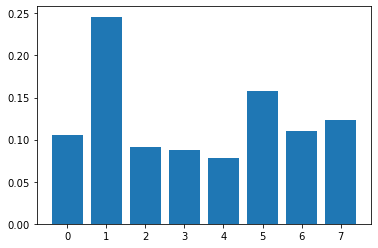

In [24]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [25]:
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [26]:
iris = datasets.load_iris()

In [27]:
type(iris)

sklearn.utils.Bunch

In [28]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [29]:
X = iris.data

In [30]:
Y = iris.target

In [31]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [32]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
